<a href="https://colab.research.google.com/github/ElianaHolanda/Primeiro-Projeto-Geracao-Tech-Unimed-BH-Ciencia-de-Dados/blob/main/Pandas_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PANDAS_GOOGLE_COLAB_COMANDO INICIAIS
import pandas as pd

In [ ]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
# juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Verficando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Consultando se tem valores Nulos no BD
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Tirando a média
df["Vendas"].mean()

122.61180089485458

In [ ]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
# Apagando as linhas com valores Nulos
df.dropna(inplace=True)

In [ ]:
# Apagando valores Nulos em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
# Apagando valores Nulos em todas coluna
df.dropna(how="all", inplace=True)

In [ ]:
# Criando colunas novas  .mul = multiplicação
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
# Verificando onde estão as maiores receitas #nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
# Retornando as 3 piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados do maior p o menor
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# TRABALHANDO COM DATAS

In [ ]:
# tRANSFORMANDO A COLUNA DE DATA EM TIPO INTEIRO
df["Data"] = df["Data"].astype("int64")

In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
# Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna com Ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
# Pegando uma amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
53,Recife,2019-01-01,37.05,983,6,222.30,2019
5,Fortaleza,2019-01-01,37.30,1002,5,186.50,2019
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,2019


In [ ]:
# Extraindo o mês e o dia da venda
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2
76,Natal,2019-02-20,364.00,853,2,728.00,2019,2,20
189,Salvador,2019-01-02,139.73,1037,2,279.46,2019,1,2
115,Salvador,2019-03-02,202.33,1035,2,404.66,2019,3,2
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1


In [ ]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias
df["Difereça_dias"] = df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Difereça_dias
114,Recife,2019-03-02,16.82,983,4,67.28,2019,3,2,2018-01-01
107,Salvador,2019-01-01,14.70,1035,1,14.70,2019,1,1,2018-01-01
55,Salvador,2019-01-01,36.62,1036,1,36.62,2019,1,1,2018-01-01
83,Recife,2019-01-01,143.61,983,6,861.66,2019,1,1,2018-01-01
59,Aracaju,2018-01-01,15.07,1523,7,105.49,2018,1,1,2018-01-01


In [ ]:
# Criando a Coluna Trimestre
df["Trimestre_vendas"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Difereça_dias,Trimestre_vendas
219,Natal,2019-01-02,19.67,1037,2,39.34,2019,1,2,2018-01-01,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,2018-01-01,1
29,Salvador,2019-01-01,9.27,1034,1,9.27,2019,1,1,2018-01-01,1
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,2019,1,1,2018-01-01,1
41,Recife,2019-02-13,157.78,981,4,631.12,2019,2,13,2018-01-01,1


In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Difereça_dias,Trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,2018-01-01,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,2018-01-01,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,2018-01-01,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,2018-01-01,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,2018-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,2018-01-01,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,2018-01-01,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,2018-01-01,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,2018-01-01,1


#Analisando dados e criando gráficos

In [ ]:
# Verificando a quantidade de vendas pelo ID da loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

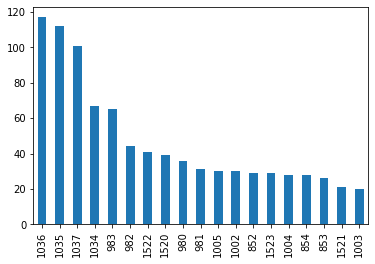

In [ ]:
# Gráfico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

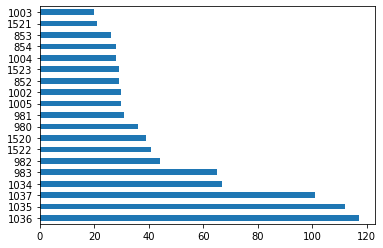

In [ ]:
# Gráfico de Barras Horizontais
df["LojaID"].value_counts(ascending=False).plot.barh();

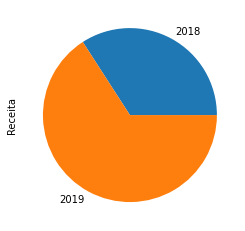

In [ ]:
# Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

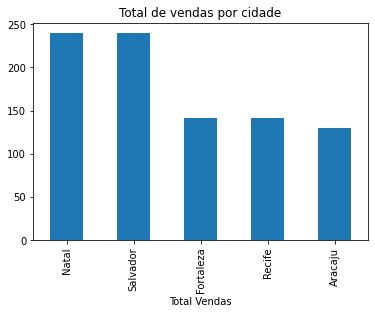

In [ ]:
# Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.xlabel("Total Vendas");

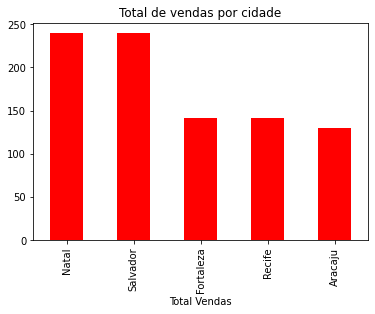

In [ ]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.xlabel("Total Vendas");

In [ ]:
# Alterando o estilo
plt.style.use("ggplot")

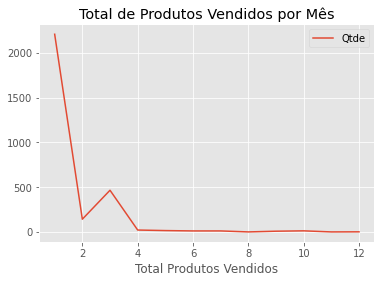

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.xlabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

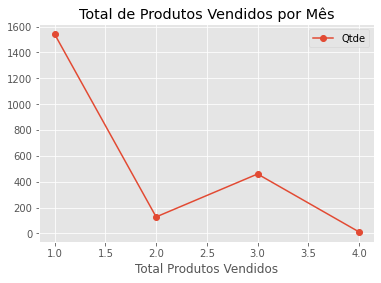

In [ ]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos por Mês", marker = "o")
plt.xlabel("Mês")
plt.xlabel("Total Produtos Vendidos")
plt.legend();

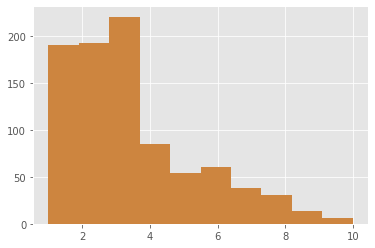

In [ ]:
# Gráfico de Histograma
plt.hist(df["Qtde"], color="peru");

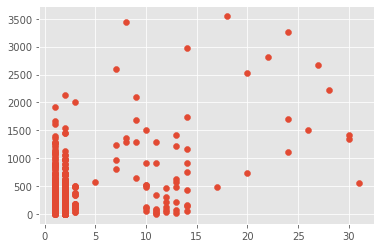

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

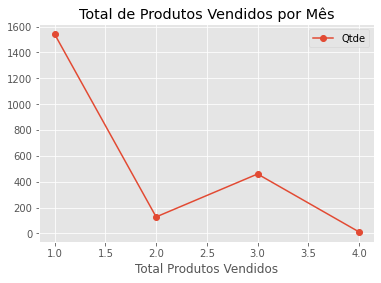

In [ ]:
# Salvando em imagem png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos por Mês", marker = "o")
plt.xlabel("Mês")
plt.xlabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE = MES.png");